In [ ]:
#Q1.1

import numpy as np
import scipy.stats as stats
from scipy.linalg import inv

# Simulated Data (for demonstration purposes)
n, p = 100, 5  # 100 observations, 5 predictors
np.random.seed(1007818630)
X = np.random.randn(n, p)  # Design matrix
true_beta = np.random.randn(p)  # True coefficients
y = X @ true_beta + np.random.randn(n) * 2  # Generate responses with noise

# Given Prior Parameters
beta_0 = np.zeros(p)  # Prior mean
Sigma_beta = np.eye(p) * 2  # Prior covariance (scaled identity matrix)

# Compute Posterior Mean and Covariance for Beta
Sigma_inv = np.eye(n)  # Since we assume sigma^2 * I, this is just identity
XTX = X.T @ X
XTy = X.T @ y

posterior_cov_beta = inv(XTX + inv(Sigma_beta))
posterior_mean_beta = posterior_cov_beta @ (XTy + inv(Sigma_beta) @ beta_0)

# Display Results
print("Posterior Mean of Beta:\n", posterior_mean_beta)
print("\nPosterior Covariance of Beta:\n", posterior_cov_beta)


Posterior Mean of Beta:
 [-0.89264022  1.00122662  0.56625242 -0.36768235  0.07233791]

Posterior Covariance of Beta:
 [[ 1.17089224e-02 -6.89451355e-04  4.31460268e-04  1.49812887e-03
  -8.88051155e-04]
 [-6.89451355e-04  1.15020836e-02  1.38504661e-03 -2.15701640e-03
  -8.48952567e-04]
 [ 4.31460268e-04  1.38504661e-03  1.03983205e-02  3.14602674e-05
  -4.48377347e-04]
 [ 1.49812887e-03 -2.15701640e-03  3.14602674e-05  1.19808298e-02
  -9.52066668e-04]
 [-8.88051155e-04 -8.48952567e-04 -4.48377347e-04 -9.52066668e-04
   9.37300319e-03]]


In [1]:
#Q1.2
import numpy as np
import scipy.stats as stats
from scipy.linalg import inv

# Simulated Data (for demonstration purposes)
n, p = 100, 5  # 100 observations, 5 predictors
np.random.seed(1007818630)
X = np.random.randn(n, p)  # Design matrix
true_beta = np.random.randn(p)  # True coefficients
y = X @ true_beta + np.random.randn(n) * 2  # Generate responses with noise

# Given Prior Parameters
beta_0 = np.zeros(p)  # Prior mean
Sigma_beta = np.eye(p) * 2  # Prior covariance (scaled identity matrix)
alpha_star = 2.0  # Prior shape parameter for sigma^2 (Inverse-Gamma)
beta_star = 1.0  # Prior scale parameter for sigma^2 (Inverse-Gamma)

# Compute Posterior Mean and Covariance for Beta
Sigma_inv = np.eye(n)  # Since we assume sigma^2 * I, this is just identity
XTX = X.T @ X
XTy = X.T @ y

posterior_cov_beta = inv(XTX + inv(Sigma_beta))
posterior_mean_beta = posterior_cov_beta @ (XTy + inv(Sigma_beta) @ beta_0)

# Compute Posterior Parameters for Sigma^2
residuals = y - X @ posterior_mean_beta
beta_posterior_alpha = alpha_star + n / 2
beta_posterior_beta = beta_star + 0.5 * residuals.T @ residuals

# Sample from Posterior Distribution of Sigma^2
sigma2_posterior_samples = stats.invgamma.rvs(beta_posterior_alpha, scale=beta_posterior_beta, size=1000)

# Display Results
print("Posterior Mean of Beta:\n", posterior_mean_beta)
print("\nPosterior Covariance of Beta:\n", posterior_cov_beta)
print("\nPosterior Parameters for Sigma^2:")
print("Shape (alpha*) =", beta_posterior_alpha)
print("Scale (beta*) =", beta_posterior_beta)
print("\nFirst 5 samples from posterior sigma^2:", sigma2_posterior_samples[:5])

Posterior Mean of Beta:
 [-0.89264022  1.00122662  0.56625242 -0.36768235  0.07233791]

Posterior Covariance of Beta:
 [[ 1.17089224e-02 -6.89451355e-04  4.31460268e-04  1.49812887e-03
  -8.88051155e-04]
 [-6.89451355e-04  1.15020836e-02  1.38504661e-03 -2.15701640e-03
  -8.48952567e-04]
 [ 4.31460268e-04  1.38504661e-03  1.03983205e-02  3.14602674e-05
  -4.48377347e-04]
 [ 1.49812887e-03 -2.15701640e-03  3.14602674e-05  1.19808298e-02
  -9.52066668e-04]
 [-8.88051155e-04 -8.48952567e-04 -4.48377347e-04 -9.52066668e-04
   9.37300319e-03]]

Posterior Parameters for Sigma^2:
Shape (alpha*) = 52.0
Scale (beta*) = 179.88291095060436

First 5 samples from posterior sigma^2: [3.48193512 3.39671897 2.71386219 2.90795946 3.78710544]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
Dataset Info:
 None

Summary Statistics:
        Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%     

Output()


Bayesian Linear Regression Results:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   5.898  0.462   5.027    6.746      0.005    0.004    7248.0   
betas[1]  14.157  0.465  13.261   15.008      0.006    0.004    6480.0   
betas[2]   0.662  0.443  -0.210    1.461      0.006    0.005    6272.0   
betas[3]   0.491  0.447  -0.356    1.313      0.006    0.005    4978.0   
betas[4]   0.273  0.448  -0.585    1.079      0.006    0.006    5611.0   
sigma     49.630  0.286  49.112   50.168      0.004    0.003    5039.0   

          ess_tail  r_hat  
betas[0]    3051.0    1.0  
betas[1]    3254.0    1.0  
betas[2]    3333.0    1.0  
betas[3]    3438.0    1.0  
betas[4]    3259.0    1.0  
sigma       3430.0    1.0  


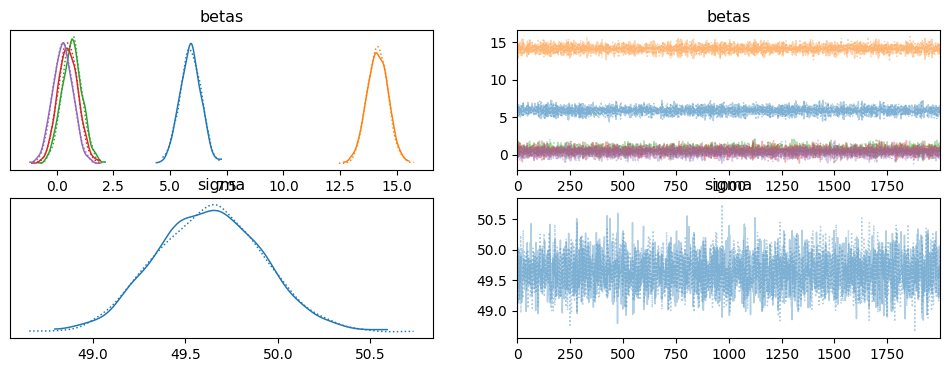

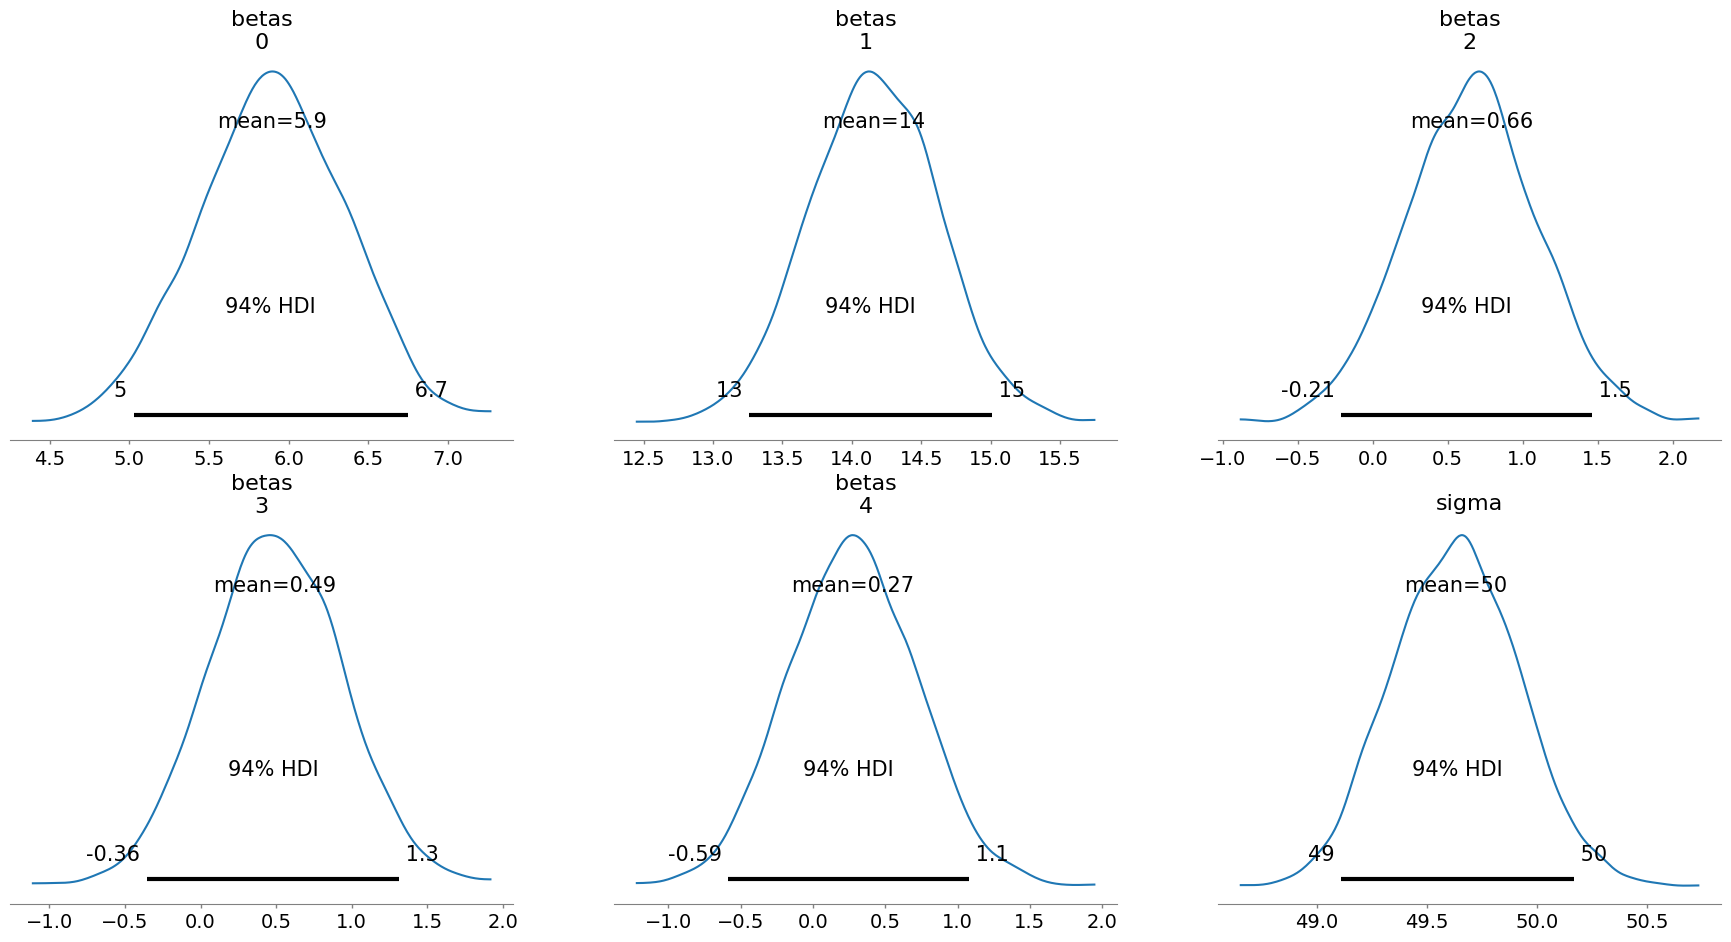

In [3]:
#Q2
#from(https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download)
#Student Performance (Multiple Linear Regression)

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
df = pd.read_csv("Student_Performance.csv")  # Ensure correct filename

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Display basic information
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nFirst Few Rows:\n", df.head())

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("\nWarning: Dataset contains missing values. Filling with column mean.")
    df.fillna(df.mean(), inplace=True)

# Define features and target variable (update column names accordingly)
X_columns = ["Hours Studied", "Previous Scores", "Extracurricular Activities"]  # Updated feature names
y_column = "Performance Index"  # Updated target variable name

# Ensure selected columns exist in the dataset
missing_cols = [col for col in X_columns + [y_column] if col not in df.columns]
if missing_cols:
    raise ValueError(f"Columns not found in dataset: {missing_cols}")

# Handle categorical variables
categorical_cols = df[X_columns].select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print("\nEncoding categorical variables:", categorical_cols)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encoding

# Extract updated feature columns
X_columns = [col for col in df.columns if col != y_column]  # Ensure we only get numeric features

# Extract data
X = df[X_columns].values
y = df[y_column].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Bayesian Linear Regression Model
with pm.Model() as model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=X.shape[1])  # Normal priors for betas
    sigma = pm.HalfNormal('sigma', sigma=1)  # Half-Normal prior for sigma
    mu = pm.math.dot(X_scaled, betas)  # Linear model

    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)  # Likelihood

    trace = pm.sample(2000, return_inferencedata=True, progressbar=True)  # Run MCMC sampling

# Summarize Results
print("\nBayesian Linear Regression Results:")
print(az.summary(trace, var_names=['betas', 'sigma']))

# Visualize Posterior Distributions & Diagnostics
az.plot_trace(trace, var_names=['betas', 'sigma'])  # Trace plots
plt.show()
az.plot_posterior(trace, var_names=['betas', 'sigma'])  # Posterior distributions
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
Dataset Info:
 None

Summary Statistics:
        Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%     

Output()


Robust Bayesian Linear Regression Results:
               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]      4.611  0.603   3.446    5.662      0.008    0.006    6264.0   
betas[1]     11.053  0.596   9.936   12.153      0.008    0.006    5454.0   
betas[2]      0.420  0.617  -0.757    1.556      0.008    0.009    5605.0   
betas[3]      0.371  0.608  -0.698    1.550      0.008    0.008    5548.0   
betas[4]      0.282  0.592  -0.881    1.311      0.008    0.008    6194.0   
...             ...    ...     ...      ...        ...      ...       ...   
tau_i[9995]   1.110  0.724   0.103    2.433      0.009    0.008    5740.0   
tau_i[9996]   1.022  0.636   0.080    2.187      0.007    0.007    6876.0   
tau_i[9997]   0.981  0.631   0.077    2.098      0.008    0.007    5829.0   
tau_i[9998]   0.924  0.589   0.059    1.963      0.007    0.006    5605.0   
tau_i[9999]   1.011  0.631   0.089    2.173      0.008    0.007    5811.0   

             ess_tail  r_hat  


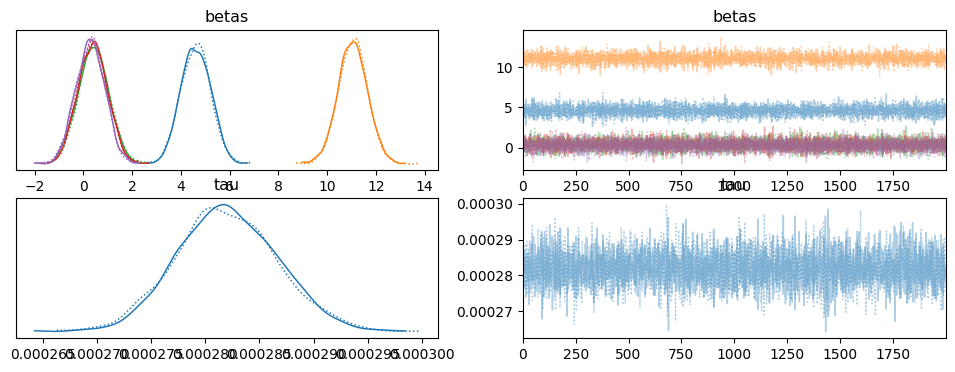

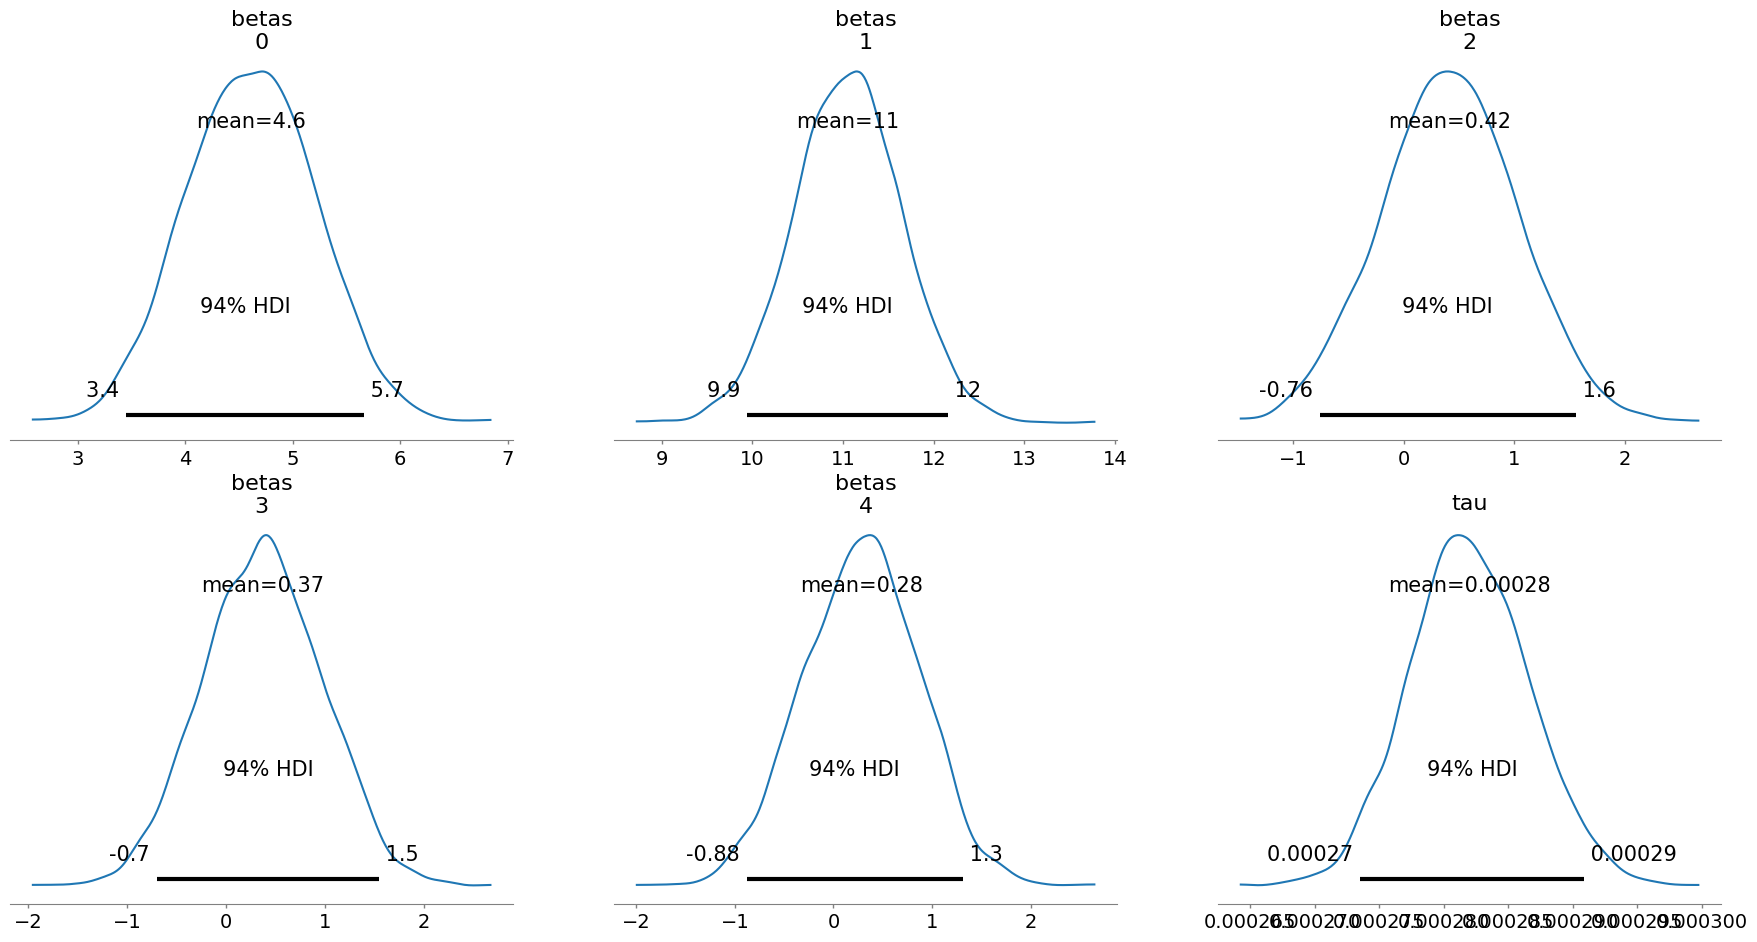


Checking the dimensions of tau_i:
FrozenMappingWarningOnValuesAccess({'chain': 2, 'draw': 2000, 'betas_dim_0': 5, 'sigma_i_dim_0': 10000, 'tau_i_dim_0': 10000})

Potential Outlier Indices: 2029


In [6]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
df = pd.read_csv("Student_Performance.csv")  # Ensure correct filename

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Introduce synthetic outliers to simulate a robust regression scenario
np.random.seed(42)
outlier_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[outlier_indices, "Performance Index"] *= 3  # Inflate values for outliers

# Display basic information
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nFirst Few Rows:\n", df.head())

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("\nWarning: Dataset contains missing values. Filling with column mean.")
    df.fillna(df.mean(), inplace=True)

# Define features and target variable (update column names accordingly)
X_columns = ["Hours Studied", "Previous Scores", "Extracurricular Activities"]  # Updated feature names
y_column = "Performance Index"  # Updated target variable name

# Ensure selected columns exist in the dataset
missing_cols = [col for col in X_columns + [y_column] if col not in df.columns]
if missing_cols:
    raise ValueError(f"Columns not found in dataset: {missing_cols}")

# Handle categorical variables
categorical_cols = df[X_columns].select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print("\nEncoding categorical variables:", categorical_cols)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encoding

# Extract updated feature columns
X_columns = [col for col in df.columns if col != y_column]  # Ensure we only get numeric features

# Extract data
X = df[X_columns].values
y = df[y_column].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Robust Bayesian Linear Regression Model
with pm.Model() as robust_model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=X.shape[1])  # Normal priors for betas
    tau = pm.Gamma('tau', alpha=2, beta=2)  # Global precision parameter
    tau_i = pm.Gamma('tau_i', alpha=2, beta=2, shape=len(y))  # Observation-specific precision parameters
    sigma_i = pm.Deterministic('sigma_i', 1 / pm.math.sqrt(tau * tau_i))  # Observation-specific std dev
    mu = pm.math.dot(X_scaled, betas)  # Linear model

    y_obs = pm.Normal('y', mu=mu, sigma=sigma_i, observed=y)  # Likelihood

    trace_robust = pm.sample(2000, return_inferencedata=True, progressbar=True)  # Run MCMC sampling

# Summarize Results
print("\nRobust Bayesian Linear Regression Results:")
print(az.summary(trace_robust, var_names=['betas', 'tau', 'tau_i']))

# Visualize Posterior Distributions & Diagnostics
az.plot_trace(trace_robust, var_names=['betas', 'tau'])  # Trace plots
plt.show()
az.plot_posterior(trace_robust, var_names=['betas', 'tau'])  # Posterior distributions
plt.show()

# Identify Outliers Based on Posterior of tau_i
print("\nChecking the dimensions of tau_i:")
print(trace_robust.posterior.dims)  # Display dimension names

tau_i_dim = "tau_i_dim_0"  # Match the actual dimension name from the printed output
posterior_tau_i = trace_robust.posterior['tau_i'].mean(dim=['chain', 'draw'])
outlier_indices = posterior_tau_i.argmin(dim=tau_i_dim).values  # Use the correct dimension name

print("\nPotential Outlier Indices:", outlier_indices)